In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
g = 9.81 
rho_0 = 1028 
T_0 = 0 
S_0 = 35  
alpha = 5.4e-5  
beta = 7.6e-4  
T_surface = 10  
T_depth = -1 
z_depth = 1000  
S = 37 

Let T be the linear gradient between the surface temperature T=10∘C and depth temperature T=−1∘C at 1000 meters.

For each depth z, I calculate T(z) and $\rho$(z) for it.

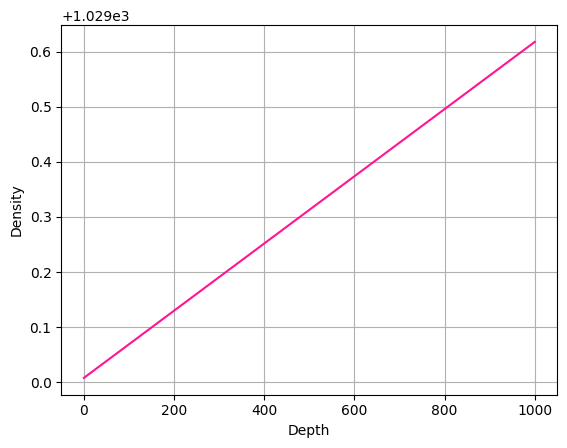

In [3]:
def T(z):
    return T_surface + (T_depth - T_surface) * (z / z_depth)

def density(T, S):
    return rho_0 * (1 - alpha * (T - T_0) + beta * (S - S_0))

z = np.arange(0, z_depth + 1, 100)  

rho = density(T(z), S)

plt.figure()
plt.plot(z, rho, color = 'deeppink')
plt.xlabel('Depth')
plt.ylabel('Density')
plt.grid(True)
plt.show()

As it goes deeper, the density also increases linearly. As it goes deeper into the ocean, both pressure and the cooling effect cause the water to become denser. 

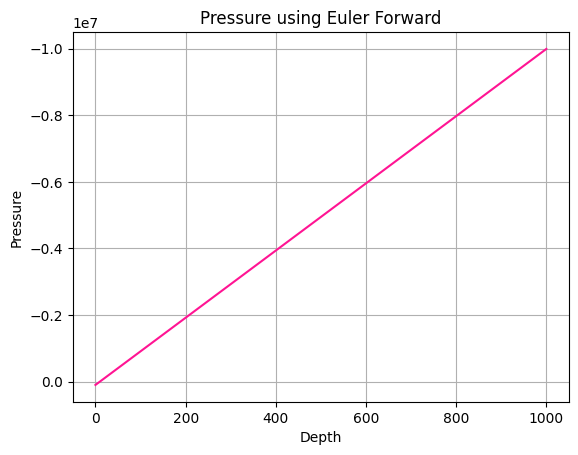

In [4]:
p_surface = 1.013e5 
dz = 100  

def euler(z, rho, dz, p_surface):
    pressures = [p_surface] 
    for i in range(1, len(z)):
        dp = -g * rho[i-1] * dz 
        pressures.append(pressures[-1] + dp) 
    return np.array(pressures)

p_euler = euler(z, rho, dz, p_surface)

plt.figure()
plt.plot(z, p_euler, color='deeppink')
plt.gca().invert_yaxis() 
plt.xlabel('Depth')
plt.ylabel('Pressure')
plt.title('Pressure using Euler Forward')
plt.grid(True)
plt.show()

As depth increases, pressure also increases. The pressure at the surface is 0 and at the depth of 1000m is 1e7 $Pa$.

Integrating the function, we got:

I use the cumulative_trapezoid function to calculate the the integral and set the initial parameter to 0. Then I overlay it with the Euler forward result for comparison and calculate the mean difference.

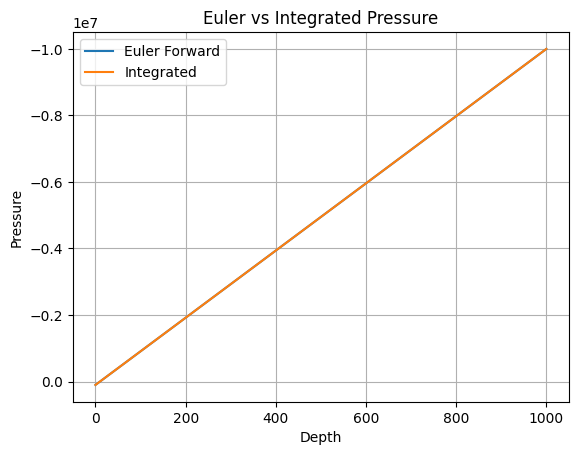

In [5]:
from scipy.integrate import cumulative_trapezoid

def integrated_p(z, rho, p_surface):
    dp_integrated = cumulative_trapezoid(-g * rho, z, initial=0)
    pressures = p_surface + dp_integrated
    return pressures

p_integrated = integrated_p(z, rho, p_surface)

plt.figure()
plt.plot(z, p_euler, label="Euler Forward")
plt.plot(z, p_integrated, label="Integrated")
plt.gca().invert_yaxis()  
plt.xlabel('Depth')
plt.ylabel('Pressure')
plt.title('Euler vs Integrated Pressure')
plt.legend()
plt.grid(True)
plt.show()

As being seen, two lines overlap and no signìicant differences observed in the plot.

In [6]:
difference = np.abs(p_euler - p_integrated)
print(f"Average difference between Euler and Integrated: {np.mean(difference):.2f} Pa")

Average difference between Euler and Integrated: 149.76 Pa


Compared to the large value of pressure, the average difference is quite small. It can be concluded that the Euler forward occurs very tiny error.

Use the same algorithm as above exercises.

In [7]:
T_surface = 20 
T_depth = 5 
scale_depth = 150 

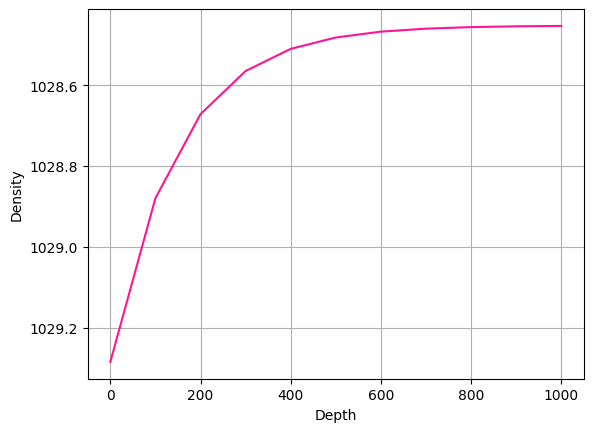

In [8]:
def T(z):
    return T_surface + (T_depth - T_surface) * np.exp(-z / scale_depth)

rho = density(T(z), S)

plt.figure()
plt.plot(z, rho, color = 'deeppink')
plt.gca().invert_yaxis() 
plt.xlabel('Depth')
plt.ylabel('Density')
plt.grid(True)
plt.show()

The density rises quickly at first but then levels off, indicating that most of the significant changes
in density is in the upper layers, while the deeper layers have smaller changes.

In [9]:
p_euler = euler(z, rho, dz, p_surface)
p_integrated = integrated_p(z, rho, p_surface)

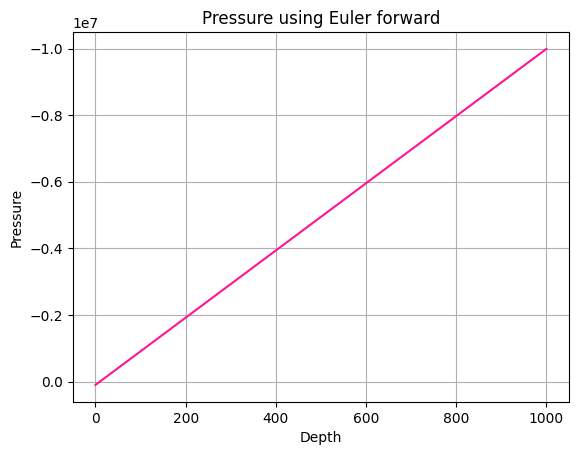

In [10]:
plt.figure()
plt.plot(z, p_euler, color = 'deeppink')
plt.xlabel('Depth')
plt.gca().invert_yaxis() 
plt.ylabel('Pressure')
plt.title('Pressure using Euler forward')
plt.grid(True)
plt.show()

As depth increases, pressure also increases.

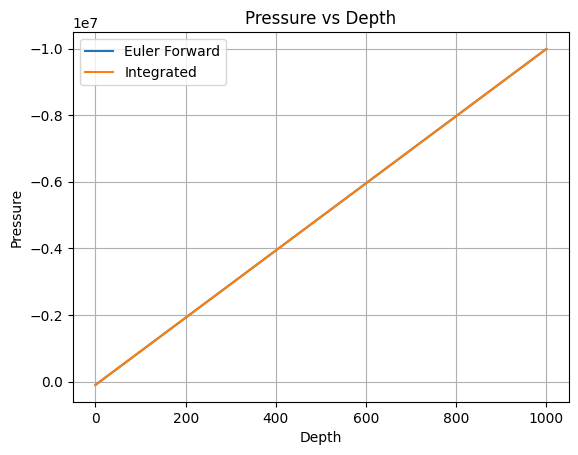

In [11]:
plt.figure()
plt.plot(z, p_euler, label="Euler Forward")
plt.plot(z, p_integrated, label="Integrated")
plt.gca().invert_yaxis() 
plt.xlabel('Depth')
plt.ylabel('Pressure')
plt.title('Pressure vs Depth')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
difference = np.abs(p_euler - p_integrated)
print(f"Average difference between Euler and Integrated: {np.mean(difference):.2f} Pa")

Average difference between Euler and Integrated: 332.17 Pa


Both lines overlap completely and the difference is very small. 